In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import geopandas as gpd
from shapely.geometry import Point

In [6]:
# read multiple csv from data folder
files = []
data_dir = '../data/'
for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        files.append(file)
print(files)

['weather_data_22_de.csv', 'weather_data_19-21_de.csv']


In [7]:
df = pd.read_csv(data_dir + files[0])

In [8]:
# Calculate midpoints
mid_latitude = df['latitude'].mean()
mid_longitude = df['longitude'].mean()

def categorize_location(row):
    if row['latitude'] >= mid_latitude and row['longitude'] <= mid_longitude:
        return 'top_left'
    elif row['latitude'] >= mid_latitude and row['longitude'] > mid_longitude:
        return 'top_right'
    elif row['latitude'] < mid_latitude and row['longitude'] <= mid_longitude:
        return 'bottom_left'
    else:
        return 'bottom_right'

# Apply the function to create the new 'location' column
df['location'] = df.apply(categorize_location, axis=1)
df['location']

0             top_left
1             top_left
2             top_left
3             top_left
4          bottom_left
              ...     
700795       top_right
700796    bottom_right
700797    bottom_right
700798    bottom_right
700799    bottom_right
Name: location, Length: 700800, dtype: object

In [9]:
path_to_germany = "../data/vg2500_geo84/vg2500_bld.shp"
germany_gdf = gpd.read_file(path_to_germany)

<Axes: >

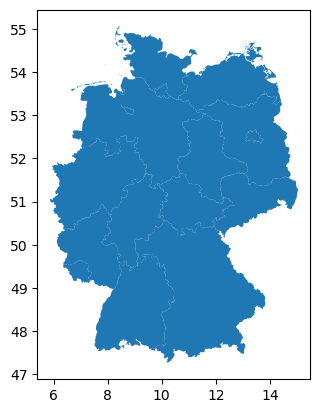

In [10]:
germany_gdf.plot()

In [11]:
print("CRS for Germany shapefile:", germany_gdf.crs)

CRS for Germany shapefile: EPSG:4326


In [12]:
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

In [13]:
geo_df.set_crs(germany_gdf.crs, inplace=True)

,longitude,latitude,forecast_origin,time,cdir,z,msl,blh,tcc,u10,...,t2m,ssr,tsr,sund,tp,fsr,u100,v100,location,geometry
0,5.8,54.2,2022-01-01,2022-01-01 00:00:00,0.0,-2.766602,101741.48,427.295720,0.990791,8.024193,...,283.23840,0.0,2.0,0.0000,0.000000,0.000165,11.497556,1.083562,top_left,POINT (5.8 54.2)
1,5.8,53.2,2022-01-01,2022-01-01 00:00:00,0.0,-6.159180,101995.71,303.664920,0.901064,3.872273,...,282.34400,0.0,2.0,0.0000,0.000000,0.262954,8.211264,2.558440,top_left,POINT (5.8 53.2)
2,5.8,52.2,2022-01-01,2022-01-01 00:00:00,0.0,478.410160,102204.98,484.987300,0.999061,4.050426,...,284.03610,0.0,2.0,0.0000,0.000000,0.435347,7.383842,4.439436,top_left,POINT (5.8 52.2)
3,5.8,51.2,2022-01-01,2022-01-01 00:00:00,0.0,237.821290,102397.62,887.467830,1.000007,3.776396,...,286.21057,0.0,2.0,0.0000,0.000000,0.646818,6.782156,3.883727,top_left,POINT (5.8 51.2)
4,5.8,50.2,2022-01-01,2022-01-01 00:00:00,0.0,4681.780000,102617.31,652.330140,1.000007,3.769761,...,283.10712,0.0,2.0,0.0000,0.000000,0.361138,6.695145,0.738800,bottom_left,POINT (5.8 50.2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700795,14.8,51.2,2022-12-31,2022-12-31 23:00:00,2753756.0,2180.343300,101623.50,634.386540,0.999977,3.098626,...,285.84726,2225824.0,4097584.0,14320.4375,0.000026,0.679872,6.180099,9.869888,top_right,POINT (14.8 51.2)
700796,14.8,50.2,2022-12-31,2022-12-31 23:00:00,3095444.0,1949.367200,101886.96,233.446350,0.998909,2.918597,...,285.45084,2708224.0,4684068.0,15934.9060,0.000140,0.622849,6.362963,6.780054,bottom_right,POINT (14.8 50.2)
700797,14.8,49.2,2022-12-31,2022-12-31 23:00:00,3582068.0,4384.653000,102017.70,41.150146,1.000007,-1.549217,...,280.16263,2902720.0,4913010.0,16403.1330,0.000028,0.850217,-0.676007,4.972480,bottom_right,POINT (14.8 49.2)
700798,14.8,48.2,2022-12-31,2022-12-31 23:00:00,3859790.0,3073.149400,102065.65,47.159424,0.974646,-2.619105,...,280.47147,3651272.0,5838524.0,19075.6720,0.000014,0.896269,-5.303223,0.821015,bottom_right,POINT (14.8 48.2)


/tmp/ipykernel_26594/1179322234.py:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('../figures/germany_weather.png')
/home/vera/anaconda3/envs/ml_renewable_es/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


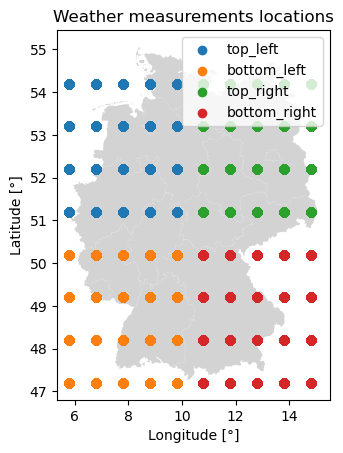

In [16]:
fig, ax = plt.subplots()
germany_gdf.plot(ax=ax, color='lightgrey')

# geo_df.plot(ax=ax, marker='o', color='red', markersize=5)
for i in geo_df['location'].unique():
    temp_df = geo_df[geo_df['location'] == i]
    ax.scatter(temp_df['longitude'], temp_df['latitude'], label=i)
ax.legend()
plt.xlabel('Longitude [°]')
plt.ylabel('Latitude [°]')
plt.title('Weather measurements locations')
plt.savefig('../figures/germany_weather.png')
plt.show()